In [43]:
import tensorflow as tf
import numpy as np
import sys
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [45]:
train_data = mnist.train
test_data = mnist.test

In [412]:
#reincia o grafo sempre para o mesmo estado
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)

In [470]:
reset_graph()

inputs_dim = 28*28
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 200
n_hidden4 = 150
n_hidden5 = 100
n_hidden6 = n_hidden4
n_hidden7 = n_hidden3
n_hidden8 = n_hidden2
n_outputs = inputs_dim

learning_rate = 0.01

Note que adicionamos um ruído gaussiano ao valor da nossa entrada. Nosso autoencoder deve aprender a remover esse ruído

In [471]:
noise_level = 0.1

X = tf.placeholder(tf.float32, shape=[None, inputs_dim])
X_noisy = X + noise_level*tf.random_normal(tf.shape(X)) 

hidden1 = tf.layers.dense(X_noisy, n_hidden1, activation=tf.nn.relu, name="hidden1")
hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3")
hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4")
hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.relu, name="hidden5")
hidden6 = tf.layers.dense(hidden5, n_hidden6, activation=tf.nn.relu, name="hidden6")
hidden7 = tf.layers.dense(hidden6, n_hidden7, activation=tf.nn.relu, name="hidden7")
hidden8 = tf.layers.dense(hidden7, n_hidden8, activation=tf.nn.relu, name="hidden8")
outputs = tf.layers.dense(hidden8, inputs_dim, name="outputs") #linear defaul


reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))#MSE

In [472]:
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

In [473]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Trainamento

In [474]:
n_epochs = 20
batch_size = 150

In [475]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in tqdm.trange(n_batches, desc="batches"):
            X_batch, y_batch = train_data.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})
        loss_test = reconstruction_loss.eval(feed_dict={X: mnist.test.images})
        print("\r{}".format(epoch), "Reconstruction loss train: ", loss_train)
        print("\r{}".format(epoch), "Reconstruction loss test: ", loss_test)
        saver.save(sess, "./my_model_stacked_denoising_gaussian.ckpt")            

batches:  94%|█████████▍| 344/366 [00:09<00:00, 34.70it/s]/Users/alexmansano/anaconda/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
batches:   0%|          | 0/366 [00:00<?, ?it/s]

0 Reconstruction loss train:  0.041329
0 Reconstruction loss test:  0.0425163


batches:   0%|          | 0/366 [00:00<?, ?it/s]

1 Reconstruction loss train:  0.0338584
1 Reconstruction loss test:  0.0335142


batches:   0%|          | 0/366 [00:00<?, ?it/s]

2 Reconstruction loss train:  0.0296068
2 Reconstruction loss test:  0.0307532


batches:   0%|          | 0/366 [00:00<?, ?it/s]

3 Reconstruction loss train:  0.0292096
3 Reconstruction loss test:  0.0301339


batches:   0%|          | 0/366 [00:00<?, ?it/s]

4 Reconstruction loss train:  0.0293227
4 Reconstruction loss test:  0.0289175


batches:   0%|          | 0/366 [00:00<?, ?it/s]

5 Reconstruction loss train:  0.0275189
5 Reconstruction loss test:  0.0279444


batches:   0%|          | 0/366 [00:00<?, ?it/s]

6 Reconstruction loss train:  0.0275872
6 Reconstruction loss test:  0.027395


batches:   0%|          | 0/366 [00:00<?, ?it/s]

7 Reconstruction loss train:  0.0268135
7 Reconstruction loss test:  0.0266173


batches:   0%|          | 0/366 [00:00<?, ?it/s]

8 Reconstruction loss train:  0.0270606
8 Reconstruction loss test:  0.0261811


batches:   0%|          | 0/366 [00:00<?, ?it/s]

9 Reconstruction loss train:  0.025874
9 Reconstruction loss test:  0.026049


batches:   0%|          | 0/366 [00:00<?, ?it/s]

10 Reconstruction loss train:  0.0254593
10 Reconstruction loss test:  0.0251427


batches:   0%|          | 0/366 [00:00<?, ?it/s]

11 Reconstruction loss train:  0.0265207
11 Reconstruction loss test:  0.0251555


batches:   0%|          | 0/366 [00:00<?, ?it/s]

12 Reconstruction loss train:  0.0249615
12 Reconstruction loss test:  0.0242571


batches:   0%|          | 0/366 [00:00<?, ?it/s]

13 Reconstruction loss train:  0.0248224
13 Reconstruction loss test:  0.0244679


batches:   0%|          | 0/366 [00:00<?, ?it/s]

14 Reconstruction loss train:  0.0237919
14 Reconstruction loss test:  0.0244452


batches:   0%|          | 0/366 [00:00<?, ?it/s]

15 Reconstruction loss train:  0.0227951
15 Reconstruction loss test:  0.0236335


batches:   0%|          | 0/366 [00:00<?, ?it/s]

16 Reconstruction loss train:  0.025081
16 Reconstruction loss test:  0.0242166


batches:   0%|          | 0/366 [00:00<?, ?it/s]

17 Reconstruction loss train:  0.0248693
17 Reconstruction loss test:  0.0241674


batches:   0%|          | 0/366 [00:00<?, ?it/s]

18 Reconstruction loss train:  0.0230553
18 Reconstruction loss test:  0.0237944


batches: 100%|██████████| 366/366 [00:09<00:00, 36.98it/s]


19 Reconstruction loss train:  0.0245065
19 Reconstruction loss test:  0.0238105


In [476]:
def plot_image(image, shape=[28, 28]):
    plt.imshow(image.reshape(shape), cmap="Greys", interpolation="nearest")
    plt.axis="off"

In [477]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_stacked_denoising_gaussian.ckpt")
    reconstructed_data = outputs.eval(feed_dict = {X: test_data.images})
    noisy_data = X_noisy.eval(feed_dict = {X: test_data.images})

INFO:tensorflow:Restoring parameters from ./my_model_stacked_denoising_gaussian.ckpt


Vamos utilizar nosso conjunto de teste para verificarmos a capacidade do nosso autoencoder reconstruir um exemplo

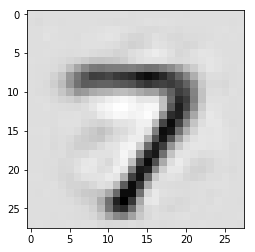

In [478]:
plot_image(reconstructed_data[0])

Abaixo temos a imagem com ruído

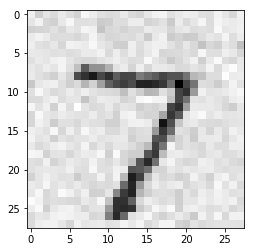

In [479]:
plot_image(noisy_data[0])

e a imagem original

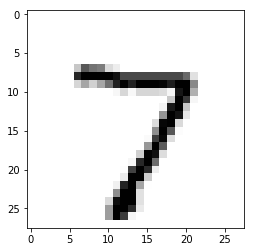

In [480]:
plot_image(mnist.test.images[0])

Vamos usar essa mesma imagem para vermos quais features nosso autoencoder aprender nas camadas mais baixas. Para isso precisamos obter os pesos da camada mais baixa.

In [481]:
def get_weights():
    return [v for v in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES) 
            if v.name.endswith('kernel:0')] #obtem apenas os weights, ignorando bias

In [482]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_stacked_denoising_gaussian.ckpt")
    features1 = sess.run(get_weights())

INFO:tensorflow:Restoring parameters from ./my_model_stacked_denoising_gaussian.ckpt


Abaixo podemos ver as features obtidas por 25 neurônios da primeira camada

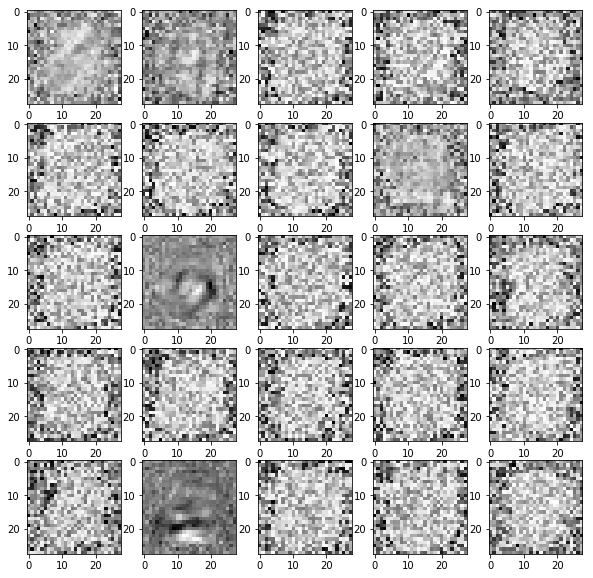

In [484]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plot_image(features1[0].T[i])
plt.show()

Agora podemos usar camadas deste modelo para treinarmos um classificador com menos dados

Vamos ver a estrutura do noss modelo

As camadas úteias para treinarmos um classificador são a 1 e 2

In [643]:
reset_graph()

inputs_dim = 28*28
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 200
n_hidden4 = 150
n_hidden5 = 100
n_hidden6 = 150
n_outputs = 10

In [644]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

In [645]:
X_train_selected = X_train[:5500] #10%
Y_train_selected = Y_train[:5500]

In [646]:
new_X = tf.placeholder(tf.float32, shape=[None, inputs_dim], name="new_X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [647]:
hidden1 = tf.layers.dense(new_X, n_hidden1, activation=tf.nn.relu, name="hidden1")
hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3")
hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.relu, name="hidden4")
hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.relu, name="hidden5")
hidden6 = tf.layers.dense(hidden5, n_hidden6, activation=tf.nn.relu, name="hidden6")
logits = tf.layers.dense(hidden6, n_outputs, activation=None, name="logits")


In [648]:
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

In [649]:
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

In [650]:
reuse_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="hidden[12345]")
restore_saver = tf.train.Saver(reuse_vars)

In [651]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="hidden[67]")
training_op = optimizer.minimize(loss, var_list=train_vars)

In [652]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [653]:
batch_size = 50
n_epochs = 400

In [654]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [655]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    init.run()
    restore_saver.restore(sess, "./my_model_stacked_denoising_gaussian.ckpt")
    
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train_selected, Y_train_selected, batch_size):
            sess.run(training_op, feed_dict={new_X: X_batch, y: y_batch})
        accuracy_test = accuracy.eval(feed_dict={new_X: X_test, y: Y_test})
        accuracy_train = accuracy.eval(feed_dict={new_X: X_train_selected, y: Y_train_selected})
        print(epoch, "Test accuracy:", accuracy_test, "Train accuracy:", accuracy_train)
    
    save_path = saver.save(sess, "./my_model_classifier_with_autoencoder.ckpt")

INFO:tensorflow:Restoring parameters from ./my_model_stacked_denoising_gaussian.ckpt
0 Test accuracy: 0.8605 Train accuracy: 0.855091
1 Test accuracy: 0.8855 Train accuracy: 0.876182
2 Test accuracy: 0.8823 Train accuracy: 0.878727
3 Test accuracy: 0.8898 Train accuracy: 0.882909
4 Test accuracy: 0.8955 Train accuracy: 0.891818
5 Test accuracy: 0.8964 Train accuracy: 0.892364
6 Test accuracy: 0.8993 Train accuracy: 0.895455
7 Test accuracy: 0.8997 Train accuracy: 0.899091
8 Test accuracy: 0.9034 Train accuracy: 0.899455
9 Test accuracy: 0.9018 Train accuracy: 0.899636
10 Test accuracy: 0.904 Train accuracy: 0.903091
11 Test accuracy: 0.906 Train accuracy: 0.903273
12 Test accuracy: 0.9061 Train accuracy: 0.904
13 Test accuracy: 0.9057 Train accuracy: 0.904545
14 Test accuracy: 0.9086 Train accuracy: 0.908909
15 Test accuracy: 0.9055 Train accuracy: 0.906909
16 Test accuracy: 0.9111 Train accuracy: 0.911091
17 Test accuracy: 0.9096 Train accuracy: 0.912545
18 Test accuracy: 0.9124 Train